<a href="https://colab.research.google.com/github/jacomof/MachineLearningClass/blob/main/APA_Practical_Work_Problem_Definition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Joaquín Figueira Chacón  
Judith Vázquez Valero

# APA Practical Work: Problem

## Dataset

### Descripción

Nuestro dataset contiene información sobre las ofertas de alojamiento de la plataforma Airbnb (los llamados _listings_) en la ciudad de Barcelona. En concreto, incluye variables sobre el anfitrión (cuánto tarda en responder, qué valoración tiene, cuánta experiencia tiene en la plataforma...) y el alojamiento en sí (en qué barrio está situado, cuántas habitaciones/baños tiene, cuántos huéspedes puede alojar...). También hay variables relacionadas con la disponibilidad, puntuación y valoración de un alojamiento.

Nuestra idea es usar este dataset para resolver un problema de regresión en el que nuestra _target variable_ sería **price**, el precio de una oferta de alojamiento.

### Fuente

El dataset se puede encontrar en http://insideairbnb.com/get-the-data.html, en la sección "Barcelona, Catalonia, Spain". Es el fichero que tiene como descripción "Detailed Listings data for Barcelona".

### Análisis

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('listings.csv')

In [ ]:
data.shape

(16206, 74)

In [ ]:
data.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,18674,https://www.airbnb.com/rooms/18674,20210910193102,2021-09-10,Huge flat for 8 people close to Sagrada Familia,110m2 apartment to rent in Barcelona. Located ...,Apartment in Barcelona located in the heart of...,https://a0.muscache.com/pictures/13031453/413c...,71615,https://www.airbnb.com/users/show/71615,Mireia And Maria,2010-01-19,"Barcelona, Catalonia, Spain","We are Mireia (43) & Maria (45), two multiling...",within an hour,100%,83%,f,https://a0.muscache.com/im/users/71615/profile...,https://a0.muscache.com/im/users/71615/profile...,la Sagrada Família,35.0,35.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,"Barcelona, CT, Spain",la Sagrada Família,Eixample,41.40556,2.17262,Entire rental unit,Entire home/apt,8,NaN,2 baths,3.0,6.0,"[""TV"", ""Wifi"", ""Hair dryer"", ""Washer"", ""Dedica...",$121.00,1,1125,1.0,3.0,1125.0,1125.0,1.6,1125.0,NaN,t,1,26,50,58,2021-09-10,21,0,0,2014-03-02,2019-10-11,4.40,4.55,4.75,4.80,4.90,4.75,4.30,HUTB-002062,t,19,19,0,0,0.23
1,23197,https://www.airbnb.com/rooms/23197,20210910193102,2021-09-11,Forum CCIB DeLuxe★Spacious &Elegant★Large Balcony,"Beautiful spacious apartment, large terrace, 5...",Strategically located in the Parc del Fòrum ar...,https://a0.muscache.com/pictures/738532/806da1...,90417,https://www.airbnb.com/users/show/90417,Etain (Marnie),2010-03-09,"Catalonia, Spain","Hi. I'm Etain, though everyone calls me by my...",within an hour,100%,70%,f,https://a0.muscache.com/im/users/90417/profile...,https://a0.muscache.com/im/users/90417/profile...,El Besòs i el Maresme,2.0,2.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,"Sant Adria de Besos, Barcelona, Spain",el Besòs i el Maresme,Sant Martí,41.41291,2.22063,Entire rental unit,Entire home/apt,6,NaN,2 baths,3.0,5.0,"[""TV"", ""Washer"", ""Bed linens"", ""Hangers"", ""Pai...",$229.00,4,300,4.0,7.0,1125.0,1125.0,4.1,1125.0,NaN,t,22,52,82,128,2021-09-11,52,0,0,2016-01-05,2019-12-15,4.74,4.92,4.92,4.94,4.98,4.67,4.69,HUTB-005057,f,2,2,0,0,0.75
2,32711,https://www.airbnb.com/rooms/32711,20210910193102,2021-09-10,Sagrada Familia area - Còrsega 1,A lovely two bedroom apartment only 250 m from...,What's nearby <br />This apartment is located...,https://a0.muscache.com/pictures/357b25e4-f414...,135703,https://www.airbnb.com/users/show/135703,Nick,2010-05-31,"Barcelona, Catalonia, Spain",I'm Nick your English host in Barcelona.\r\n\r...,within an hour,100%,100%,f,https://a0.muscache.com/im/users/135703/profil...,https://a0.muscache.com/im/users/135703/profil...,Camp d'en Grassot i Gràcia Nova,5.0,5.0,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,t,"Barcelona, Catalonia, Spain",el Camp d'en Grassot i Gràcia Nova,Gràcia,41

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16206 entries, 0 to 16205
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            16206 non-null  int64  
 1   listing_url                                   16206 non-null  object 
 2   scrape_id                                     16206 non-null  int64  
 3   last_scraped                                  16206 non-null  object 
 4   name                                          16196 non-null  object 
 5   description                                   16088 non-null  object 
 6   neighborhood_overview                         9650 non-null   object 
 7   picture_url                                   16206 non-null  object 
 8   host_id                                       16206 non-null  int64  
 9   host_url                                      16206 non-null 

Aquí vemos que nuestra _target variable_ **price** aparece como un string. En realidad nos interesa que sea numérica así que aquí hacemos las transformaciones necesarias.

In [ ]:
data.price

0        $121.00
1        $229.00
2        $144.00
3        $189.00
4         $41.00
          ...   
16201     $58.00
16202    $110.00
16203     $18.00
16204    $265.00
16205    $225.00
Name: price, Length: 16206, dtype: object

In [ ]:
data.price = data.price.str[1:]
data.price = [x.replace(',', '') for x in data.price]
data.price = pd.to_numeric(data.price)

In [ ]:
data.price

0        121.0
1        229.0
2        144.0
3        189.0
4         41.0
         ...  
16201     58.0
16202    110.0
16203     18.0
16204    265.0
16205    225.0
Name: price, Length: 16206, dtype: float64

#### Visualización

In [ ]:
num_data = data.select_dtypes(include='number')

/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


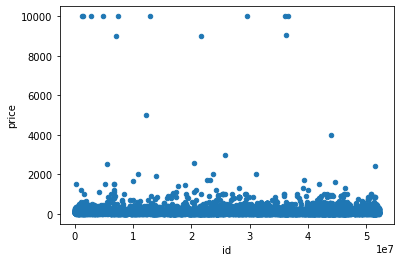

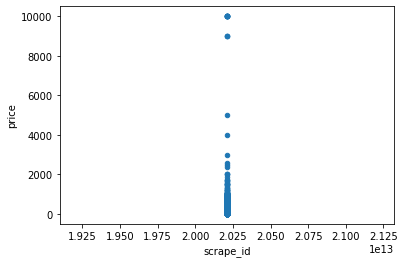

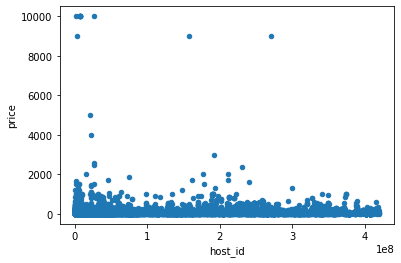

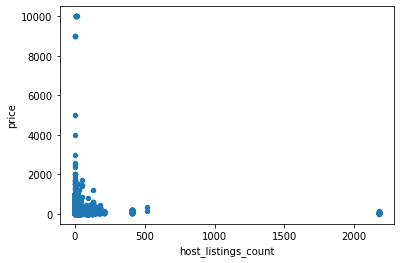

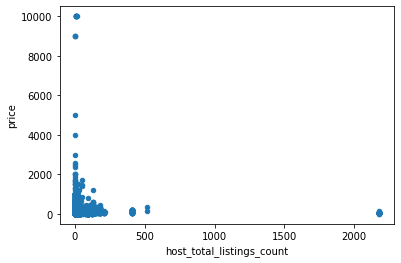

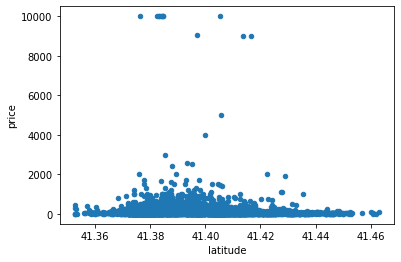

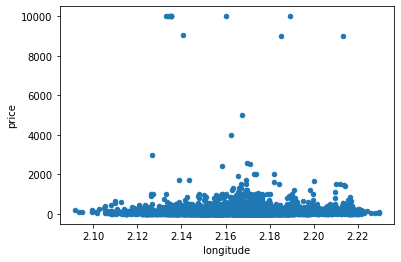

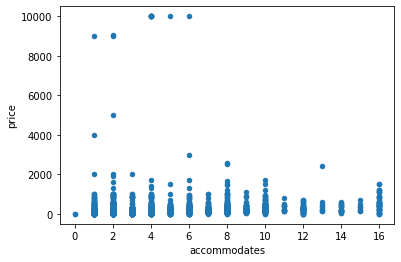

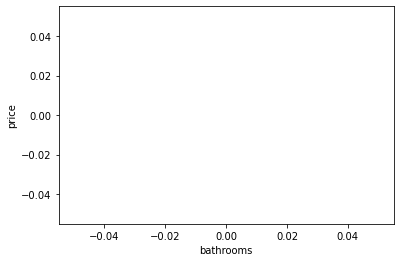

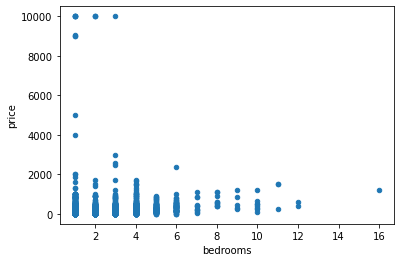

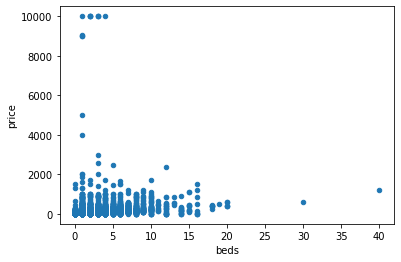

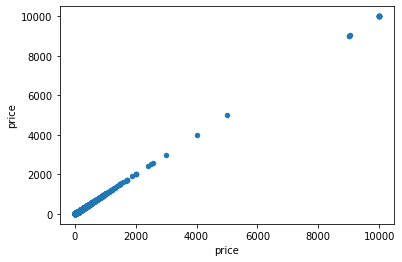

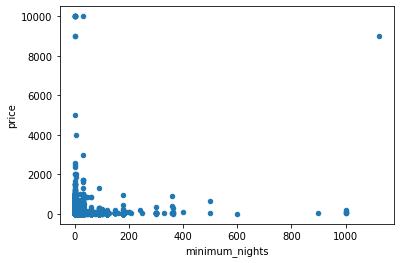

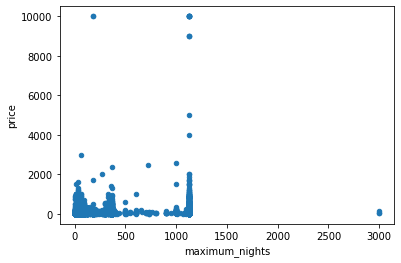

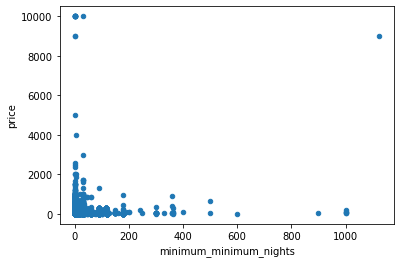

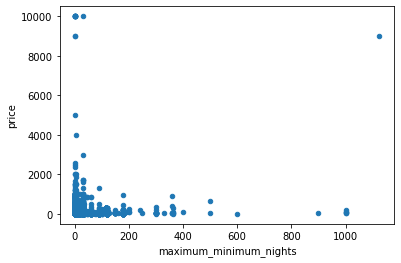

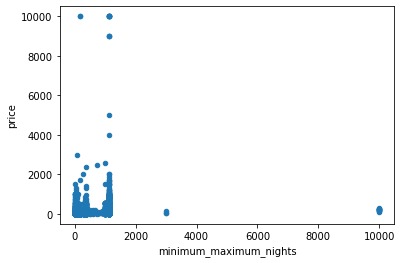

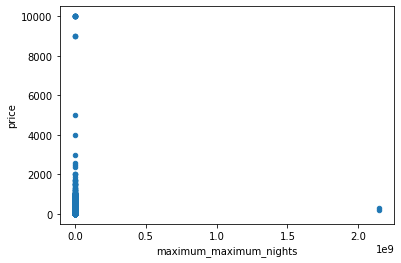

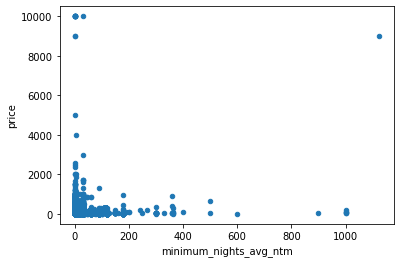

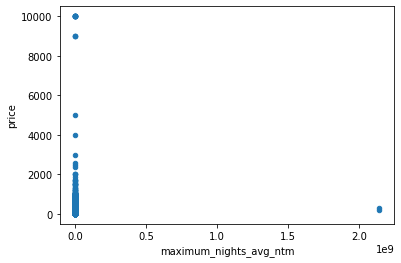

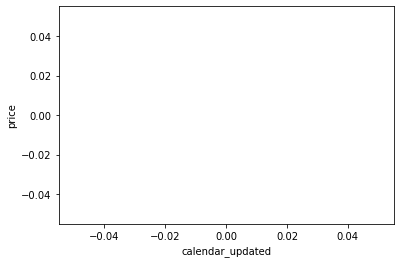

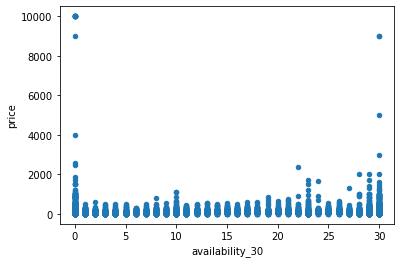

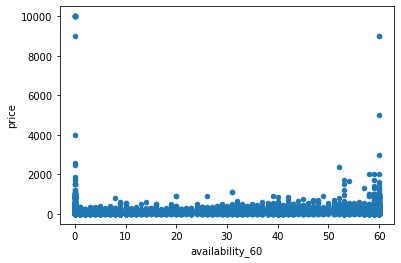

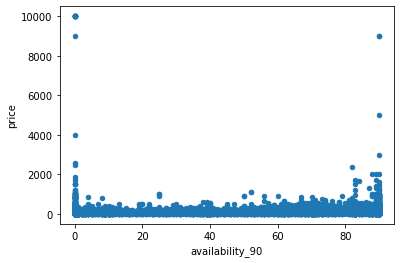

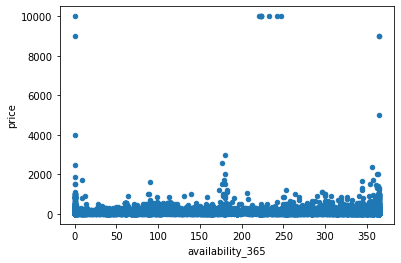

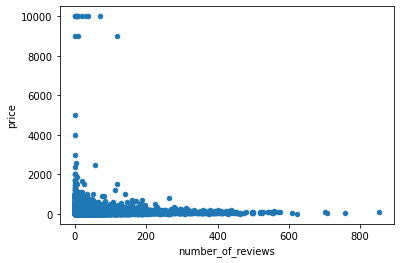

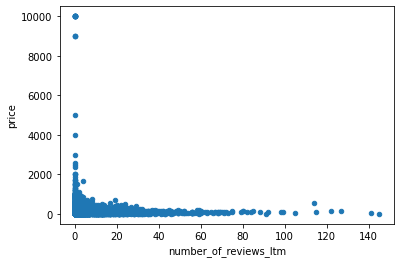

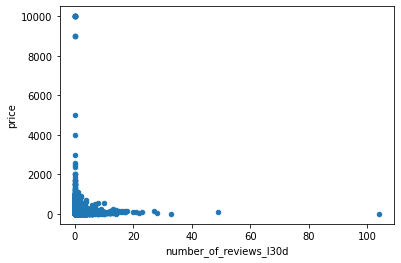

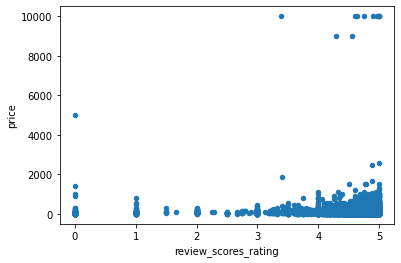

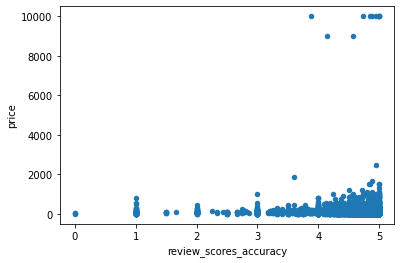

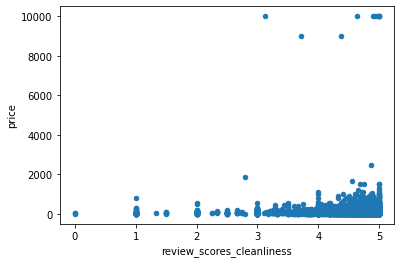

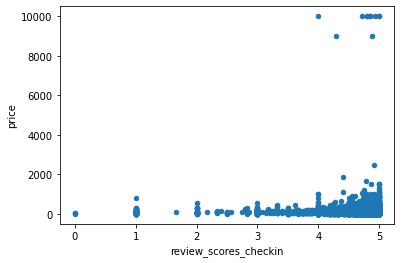

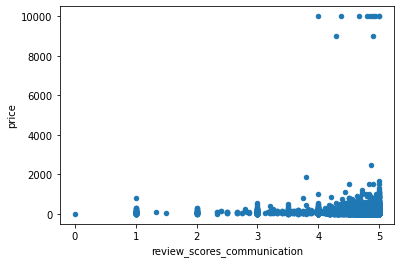

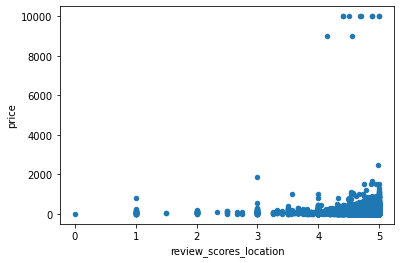

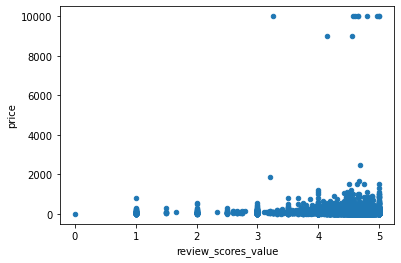

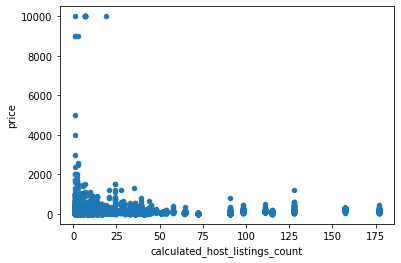

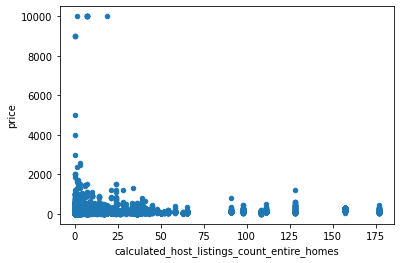

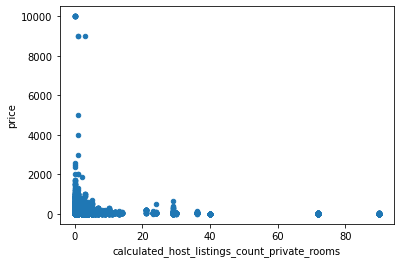

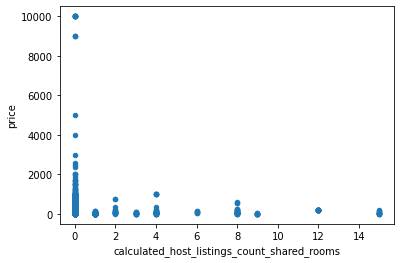

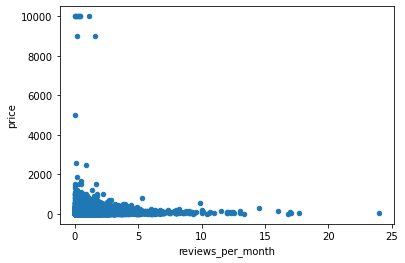

In [ ]:
for var in num_data:
    num_data.plot.scatter(x=var, y='price')

#### Matriz de correlación

Parece indicar que entre la mayoría de variables no existe correlación. Una excepción son las variables que describen los distintos aspectos valorados de un alojamiento  (su limpieza, la comunicación, la puntuación general), entre las que sí que parece existir una correlación positiva.

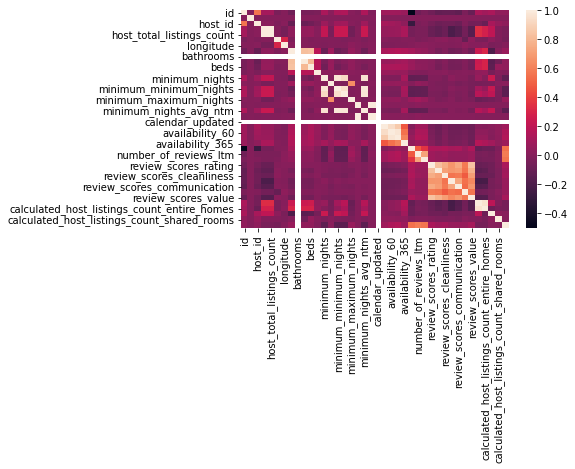

In [ ]:
corr_matrix = num_data.corr()
sns.heatmap(corr_matrix)
plt.show()

#### Conclusiones

Una de las cosas que más nos llaman la atención es el gran número de variables que tenemos. Por lo que hemos estado viendo, es posible que podamos prescindir de algunas de ellas. Por ejemplo: los nombres y las descripciones del apartamento (estilo: "a lovely two-bedroom apartment..."), así como los nombres y las descripciones del host.

En lo relativo a los tipos de cada variable, creemos que sería buena idea cambiar las variables que se refieren a identificadores de numéricas a categóricas. Posiblemente podremos hacer otros cambios que ya detectaremos cuando analicemos el dataset más a fondo.

En principio nuestro dataset no tiene un componente temporal como tal, pero hemos detectado que tenemos algunas fechas que indican, por ejemplo, cuándo se hizo la recolección de estos datos, cuándo se hizo la primera y la última _review_ de una oferta, etc. Creemos que, para los objetivos que nos proponemos, podríamos prescindir de estas variables si fuera necesario.